# Progress 5: Model Evaluation and Refinement

---

**Course:** SECB3203 Programming for Bioinformatics  
**Project:** Early Detection of Parkinson's Disease Using Machine Learning  
**Section:** 02

---

**Group Members:**

| Name | Matric Number |
|------|---------------|
| MUHAMMAD AMIRUN IRFAN BIN SAMSUL SHAH | A23CS0121 |
| MUHAMMAD HAFIZ BIN MOHD SHAHARUDDIN | A23CS0130 |
| MUHAMMAD ZAFRIL IHSAN BIN MOHAMAD NASIR | A23CS0304 |

---

## Table of Contents

1. Introduction
2. Importing Libraries and Dataset
3. Data Preparation
4. Model Evaluation Techniques
5. Cross-Validation
6. Overfitting, Underfitting, and Model Selection
7. Ridge Regression and Regularization
8. Grid Search for Hyperparameter Tuning
9. Model Refinement
10. Final Model Selection and Evaluation
11. Summary and Conclusion

---
## 1. Introduction
---

Model evaluation is a crucial step in the machine learning pipeline that determines how well our models perform and whether they will generalize to new, unseen data. This progress report focuses on comprehensive model evaluation techniques, addressing issues such as overfitting and underfitting, and refining models through hyperparameter tuning.

The objectives of this progress are:
1. To evaluate model performance using various metrics and cross-validation techniques
2. To identify and address overfitting and underfitting issues
3. To apply regularization techniques including Ridge regression
4. To perform hyperparameter tuning using Grid Search
5. To refine and select the best performing model for Parkinson's disease classification

The findings from this evaluation will guide the selection of the final model for deployment in clinical decision support systems.

---
## 2. Importing Libraries and Dataset
---

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Scikit-learn imports for preprocessing
from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_val_predict,
    StratifiedKFold, learning_curve, validation_curve, GridSearchCV
)
from sklearn.preprocessing import StandardScaler

# Scikit-learn imports for models
from sklearn.linear_model import LogisticRegression, Ridge, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Scikit-learn imports for evaluation
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score,
    roc_curve, auc, roc_auc_score,
    mean_squared_error, r2_score
)

# Suppress warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully.")

All libraries imported successfully.


In [2]:
# Load the dataset
df = pd.read_csv('Parkinsson_disease.csv')

# Remove the 'name' column
df = df.drop(columns=['name'])

print("Dataset loaded successfully.")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully.
Dataset shape: (195, 23)


---
## 3. Data Preparation
---

In [3]:
# Separate features and target
X = df.drop(columns=['status'])
y = df['status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Data Preparation Completed:")
print("="*50)
print(f"Training set: {X_train_scaled.shape[0]} samples")
print(f"Testing set: {X_test_scaled.shape[0]} samples")
print(f"Features: {X_train_scaled.shape[1]}")

Data Preparation Completed:
Training set: 156 samples
Testing set: 39 samples
Features: 22


---
## 4. Model Evaluation Techniques
---

This section demonstrates various techniques for evaluating machine learning models. We will train multiple models and assess their performance using different metrics.

### 4.1 Training Base Models

In [4]:
# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42, probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train all models and store results
results = {}

print("Training Base Models:")
print("="*70)

for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    y_test_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc_score = roc_auc_score(y_test, y_test_prob)
    
    # Store results
    results[name] = {
        'model': model,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc_score,
        'y_test_pred': y_test_pred,
        'y_test_prob': y_test_prob
    }
    
    print(f"\n{name}:")
    print(f"  Training Accuracy: {train_acc*100:.2f}%")
    print(f"  Testing Accuracy:  {test_acc*100:.2f}%")
    print(f"  Difference:        {(train_acc - test_acc)*100:.2f}%")

Training Base Models:

Logistic Regression:
  Training Accuracy: 86.54%
  Testing Accuracy:  92.31%
  Difference:        -5.77%

SVM (RBF):
  Training Accuracy: 89.10%
  Testing Accuracy:  92.31%
  Difference:        -3.21%

Random Forest:
  Training Accuracy: 100.00%
  Testing Accuracy:  92.31%
  Difference:        7.69%

Gradient Boosting:
  Training Accuracy: 100.00%
  Testing Accuracy:  92.31%
  Difference:        7.69%

Decision Tree:
  Training Accuracy: 100.00%
  Testing Accuracy:  84.62%
  Difference:        15.38%


### 4.2 Comprehensive Evaluation Metrics

In [5]:
# Create comprehensive comparison table
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train Accuracy (%)': [results[m]['train_acc']*100 for m in results],
    'Test Accuracy (%)': [results[m]['test_acc']*100 for m in results],
    'Precision (%)': [results[m]['precision']*100 for m in results],
    'Recall (%)': [results[m]['recall']*100 for m in results],
    'F1-Score (%)': [results[m]['f1']*100 for m in results],
    'AUC': [results[m]['auc'] for m in results],
    'Overfit Gap (%)': [(results[m]['train_acc'] - results[m]['test_acc'])*100 for m in results]
})

print("Comprehensive Model Evaluation:")
print("="*90)
print(comparison_df.round(2).to_string(index=False))

Comprehensive Model Evaluation:
              Model  Train Accuracy (%)  Test Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)  AUC  Overfit Gap (%)
Logistic Regression               86.54              92.31          93.33       96.55         94.92 0.92            -5.77
          SVM (RBF)               89.10              92.31          90.62      100.00         95.08 0.96            -3.21
      Random Forest              100.00              92.31          93.33       96.55         94.92 0.96             7.69
  Gradient Boosting              100.00              92.31          96.43       93.10         94.74 0.98             7.69
      Decision Tree              100.00              84.62          89.66       89.66         89.66 0.80            15.38


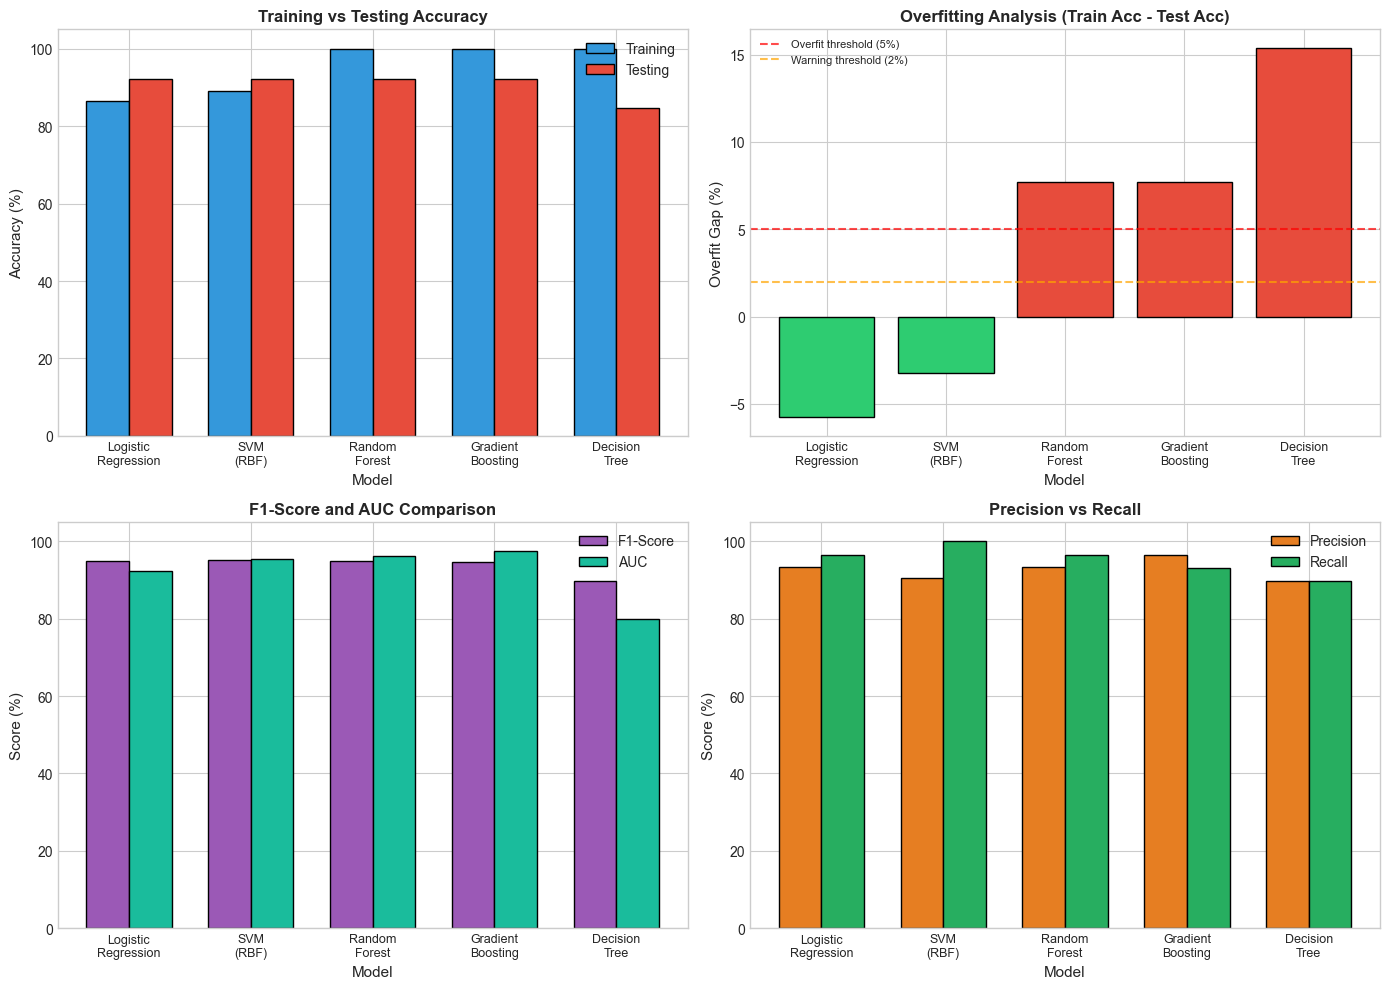

Figure saved: Eval_01_model_comparison.png


In [6]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Training vs Testing Accuracy
ax1 = axes[0, 0]
x = np.arange(len(results))
width = 0.35
train_accs = [results[m]['train_acc']*100 for m in results]
test_accs = [results[m]['test_acc']*100 for m in results]

bars1 = ax1.bar(x - width/2, train_accs, width, label='Training', color='#3498db', edgecolor='black')
bars2 = ax1.bar(x + width/2, test_accs, width, label='Testing', color='#e74c3c', edgecolor='black')

ax1.set_xlabel('Model', fontsize=11)
ax1.set_ylabel('Accuracy (%)', fontsize=11)
ax1.set_title('Training vs Testing Accuracy', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels([m.replace(' ', '\n') for m in results.keys()], fontsize=9)
ax1.legend()
ax1.set_ylim(0, 105)

# Plot 2: Overfitting Gap
ax2 = axes[0, 1]
gaps = [(results[m]['train_acc'] - results[m]['test_acc'])*100 for m in results]
colors = ['#e74c3c' if g > 5 else '#f39c12' if g > 2 else '#2ecc71' for g in gaps]
ax2.bar(list(results.keys()), gaps, color=colors, edgecolor='black')
ax2.set_xlabel('Model', fontsize=11)
ax2.set_ylabel('Overfit Gap (%)', fontsize=11)
ax2.set_title('Overfitting Analysis (Train Acc - Test Acc)', fontsize=12, fontweight='bold')
ax2.axhline(y=5, color='red', linestyle='--', alpha=0.7, label='Overfit threshold (5%)')
ax2.axhline(y=2, color='orange', linestyle='--', alpha=0.7, label='Warning threshold (2%)')
ax2.set_xticklabels([m.replace(' ', '\n') for m in results.keys()], fontsize=9, rotation=0)
ax2.legend(fontsize=8)

# Plot 3: F1-Score and AUC
ax3 = axes[1, 0]
f1_scores = [results[m]['f1']*100 for m in results]
auc_scores = [results[m]['auc']*100 for m in results]

ax3.bar(x - width/2, f1_scores, width, label='F1-Score', color='#9b59b6', edgecolor='black')
ax3.bar(x + width/2, auc_scores, width, label='AUC', color='#1abc9c', edgecolor='black')

ax3.set_xlabel('Model', fontsize=11)
ax3.set_ylabel('Score (%)', fontsize=11)
ax3.set_title('F1-Score and AUC Comparison', fontsize=12, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels([m.replace(' ', '\n') for m in results.keys()], fontsize=9)
ax3.legend()
ax3.set_ylim(0, 105)

# Plot 4: Precision vs Recall
ax4 = axes[1, 1]
precision_scores = [results[m]['precision']*100 for m in results]
recall_scores = [results[m]['recall']*100 for m in results]

ax4.bar(x - width/2, precision_scores, width, label='Precision', color='#e67e22', edgecolor='black')
ax4.bar(x + width/2, recall_scores, width, label='Recall', color='#27ae60', edgecolor='black')

ax4.set_xlabel('Model', fontsize=11)
ax4.set_ylabel('Score (%)', fontsize=11)
ax4.set_title('Precision vs Recall', fontsize=12, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels([m.replace(' ', '\n') for m in results.keys()], fontsize=9)
ax4.legend()
ax4.set_ylim(0, 105)

plt.tight_layout()
plt.savefig('Eval_01_model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Eval_01_model_comparison.png")

---
## 5. Cross-Validation
---

Cross-validation provides a more robust estimate of model performance by training and testing on multiple different subsets of the data.

### 5.1 K-Fold Cross-Validation

In [7]:
# Perform Stratified K-Fold Cross-Validation
print("Stratified 10-Fold Cross-Validation Results:")
print("="*70)

# Use all data for cross-validation
X_scaled_all = scaler.fit_transform(X)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results = {}

for name, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X_scaled_all, y, cv=cv, scoring='accuracy')
    
    cv_results[name] = {
        'scores': scores,
        'mean': scores.mean(),
        'std': scores.std()
    }
    
    print(f"\n{name}:")
    print(f"  Fold Scores: {[f'{s*100:.1f}%' for s in scores]}")
    print(f"  Mean Accuracy: {scores.mean()*100:.2f}% (+/- {scores.std()*100:.2f}%)")

Stratified 10-Fold Cross-Validation Results:

Logistic Regression:
  Fold Scores: ['95.0%', '95.0%', '90.0%', '85.0%', '95.0%', '73.7%', '84.2%', '89.5%', '84.2%', '73.7%']
  Mean Accuracy: 86.53% (+/- 7.61%)

SVM (RBF):
  Fold Scores: ['90.0%', '90.0%', '95.0%', '90.0%', '95.0%', '89.5%', '84.2%', '84.2%', '84.2%', '78.9%']
  Mean Accuracy: 88.11% (+/- 4.87%)

Random Forest:
  Fold Scores: ['95.0%', '100.0%', '90.0%', '95.0%', '95.0%', '89.5%', '94.7%', '94.7%', '78.9%', '78.9%']
  Mean Accuracy: 91.18% (+/- 6.71%)

Gradient Boosting:
  Fold Scores: ['95.0%', '100.0%', '90.0%', '95.0%', '100.0%', '89.5%', '89.5%', '94.7%', '78.9%', '89.5%']
  Mean Accuracy: 92.21% (+/- 5.89%)

Decision Tree:
  Fold Scores: ['90.0%', '95.0%', '80.0%', '95.0%', '95.0%', '89.5%', '78.9%', '94.7%', '78.9%', '89.5%']
  Mean Accuracy: 88.66% (+/- 6.51%)


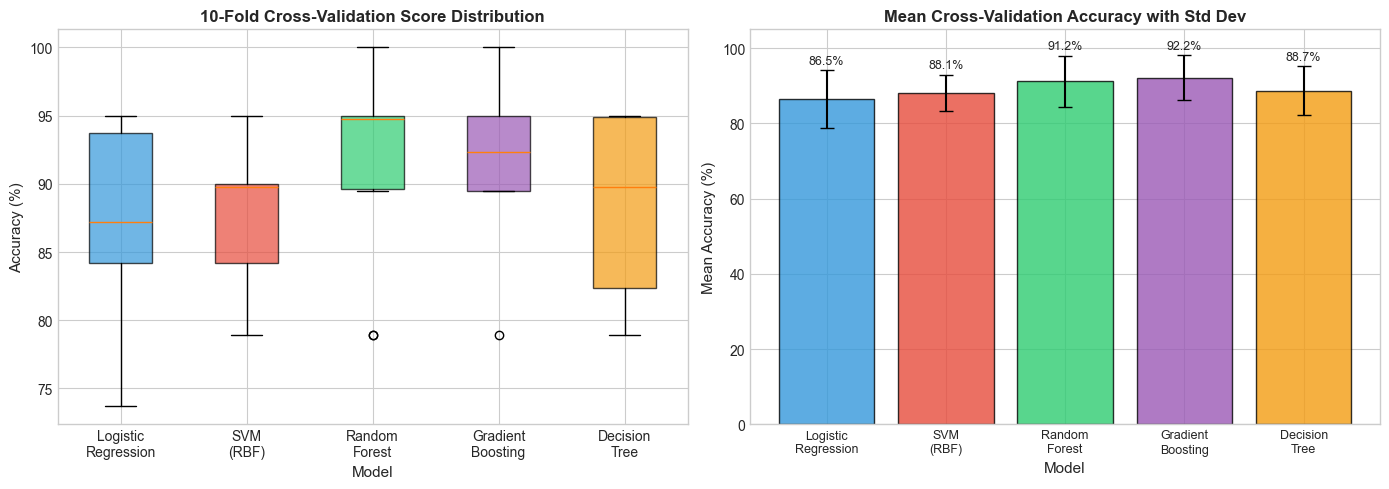

Figure saved: Eval_02_cross_validation.png


In [8]:
# Visualize cross-validation results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Box plot of CV scores
ax1 = axes[0]
cv_data = [cv_results[m]['scores']*100 for m in cv_results]
bp = ax1.boxplot(cv_data, labels=[m.replace(' ', '\n') for m in cv_results.keys()], patch_artist=True)

colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f39c12']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_xlabel('Model', fontsize=11)
ax1.set_ylabel('Accuracy (%)', fontsize=11)
ax1.set_title('10-Fold Cross-Validation Score Distribution', fontsize=12, fontweight='bold')

# Plot 2: Mean CV score with error bars
ax2 = axes[1]
means = [cv_results[m]['mean']*100 for m in cv_results]
stds = [cv_results[m]['std']*100 for m in cv_results]

bars = ax2.bar(list(cv_results.keys()), means, yerr=stds, capsize=5, 
               color=colors, edgecolor='black', alpha=0.8)
ax2.set_xlabel('Model', fontsize=11)
ax2.set_ylabel('Mean Accuracy (%)', fontsize=11)
ax2.set_title('Mean Cross-Validation Accuracy with Std Dev', fontsize=12, fontweight='bold')
ax2.set_xticklabels([m.replace(' ', '\n') for m in cv_results.keys()], fontsize=9)
ax2.set_ylim(0, 105)

# Add value labels
for bar, mean, std in zip(bars, means, stds):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 1,
             f'{mean:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('Eval_02_cross_validation.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Eval_02_cross_validation.png")

### 5.2 Cross-Validation Summary

In [9]:
# Create CV summary table
cv_summary = pd.DataFrame({
    'Model': list(cv_results.keys()),
    'Mean CV Accuracy (%)': [cv_results[m]['mean']*100 for m in cv_results],
    'Std Dev (%)': [cv_results[m]['std']*100 for m in cv_results],
    'Min Fold (%)': [cv_results[m]['scores'].min()*100 for m in cv_results],
    'Max Fold (%)': [cv_results[m]['scores'].max()*100 for m in cv_results]
}).sort_values('Mean CV Accuracy (%)', ascending=False)

print("Cross-Validation Summary (Sorted by Mean Accuracy):")
print("="*70)
print(cv_summary.round(2).to_string(index=False))

Cross-Validation Summary (Sorted by Mean Accuracy):
              Model  Mean CV Accuracy (%)  Std Dev (%)  Min Fold (%)  Max Fold (%)
  Gradient Boosting                 92.21         5.89         78.95         100.0
      Random Forest                 91.18         6.71         78.95         100.0
      Decision Tree                 88.66         6.51         78.95          95.0
          SVM (RBF)                 88.11         4.87         78.95          95.0
Logistic Regression                 86.53         7.61         73.68          95.0


---
## 6. Overfitting, Underfitting, and Model Selection
---

Understanding overfitting and underfitting is crucial for building models that generalize well to new data.

### 6.1 Learning Curves Analysis

In [10]:
# Generate learning curves for selected models
def plot_learning_curve(model, title, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
    
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_mean = test_scores.mean(axis=1)
    test_std = test_scores.std(axis=1)
    
    return train_sizes, train_mean, train_std, test_mean, test_std

# Select models for learning curve analysis
selected_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

print("Generating Learning Curves (this may take a moment)...")

Generating Learning Curves (this may take a moment)...


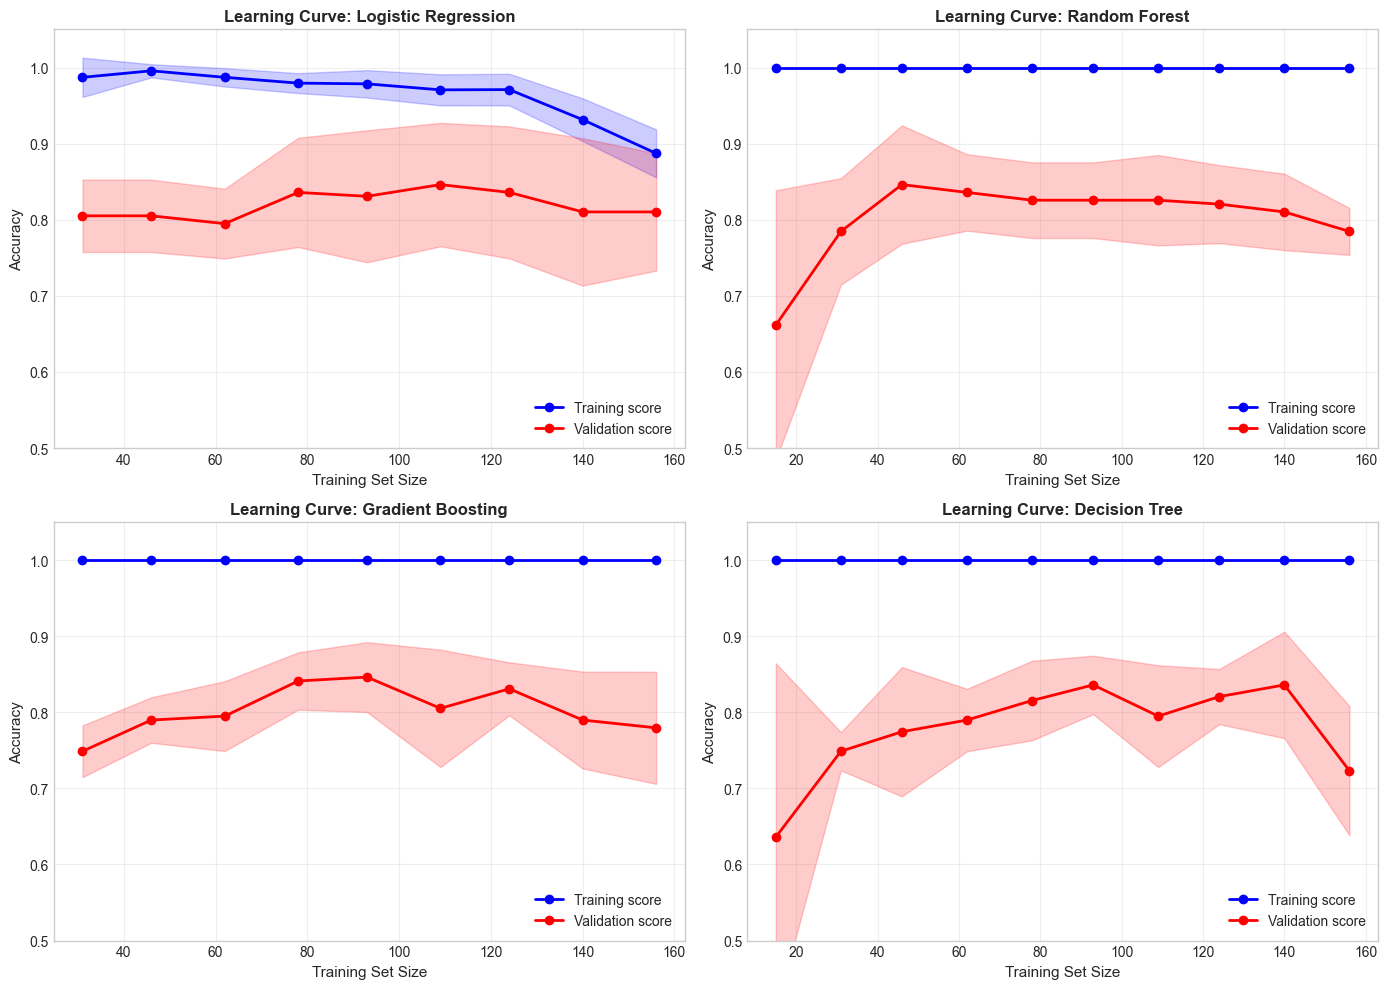

Figure saved: Eval_03_learning_curves.png


In [11]:
# Plot learning curves
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, (name, model) in zip(axes, selected_models.items()):
    train_sizes, train_mean, train_std, test_mean, test_std = plot_learning_curve(
        model, name, X_scaled_all, y, cv=5
    )
    
    # Plot training scores
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
    ax.plot(train_sizes, train_mean, 'o-', color='blue', linewidth=2, label='Training score')
    
    # Plot validation scores
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')
    ax.plot(train_sizes, test_mean, 'o-', color='red', linewidth=2, label='Validation score')
    
    ax.set_xlabel('Training Set Size', fontsize=11)
    ax.set_ylabel('Accuracy', fontsize=11)
    ax.set_title(f'Learning Curve: {name}', fontsize=12, fontweight='bold')
    ax.legend(loc='lower right')
    ax.set_ylim(0.5, 1.05)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Eval_03_learning_curves.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Eval_03_learning_curves.png")

### 6.2 Overfitting and Underfitting Analysis

In [12]:
# Analyze overfitting/underfitting based on results
print("Overfitting and Underfitting Analysis:")
print("="*70)

for name in results:
    train_acc = results[name]['train_acc']
    test_acc = results[name]['test_acc']
    gap = train_acc - test_acc
    
    print(f"\n{name}:")
    print(f"  Training Accuracy: {train_acc*100:.2f}%")
    print(f"  Testing Accuracy:  {test_acc*100:.2f}%")
    print(f"  Gap: {gap*100:.2f}%")
    
    # Diagnosis
    if train_acc < 0.75:
        print(f"  Diagnosis: UNDERFITTING - Model is too simple")
        print(f"  Suggestion: Increase model complexity or add more features")
    elif gap > 0.10:
        print(f"  Diagnosis: SEVERE OVERFITTING - Model memorized training data")
        print(f"  Suggestion: Reduce model complexity, add regularization, or get more data")
    elif gap > 0.05:
        print(f"  Diagnosis: MODERATE OVERFITTING - Some generalization issues")
        print(f"  Suggestion: Consider regularization or cross-validation")
    elif gap > 0.02:
        print(f"  Diagnosis: SLIGHT OVERFITTING - Minor concern")
        print(f"  Suggestion: Monitor but acceptable for most applications")
    else:
        print(f"  Diagnosis: GOOD FIT - Model generalizes well")
        print(f"  Suggestion: Model is performing as expected")

Overfitting and Underfitting Analysis:

Logistic Regression:
  Training Accuracy: 86.54%
  Testing Accuracy:  92.31%
  Gap: -5.77%
  Diagnosis: GOOD FIT - Model generalizes well
  Suggestion: Model is performing as expected

SVM (RBF):
  Training Accuracy: 89.10%
  Testing Accuracy:  92.31%
  Gap: -3.21%
  Diagnosis: GOOD FIT - Model generalizes well
  Suggestion: Model is performing as expected

Random Forest:
  Training Accuracy: 100.00%
  Testing Accuracy:  92.31%
  Gap: 7.69%
  Diagnosis: MODERATE OVERFITTING - Some generalization issues
  Suggestion: Consider regularization or cross-validation

Gradient Boosting:
  Training Accuracy: 100.00%
  Testing Accuracy:  92.31%
  Gap: 7.69%
  Diagnosis: MODERATE OVERFITTING - Some generalization issues
  Suggestion: Consider regularization or cross-validation

Decision Tree:
  Training Accuracy: 100.00%
  Testing Accuracy:  84.62%
  Gap: 15.38%
  Diagnosis: SEVERE OVERFITTING - Model memorized training data
  Suggestion: Reduce model compl

In [13]:
# Demonstrate overfitting with Decision Tree depth
print("\nDemonstrating Overfitting with Decision Tree Depth:")
print("="*60)

depths = range(1, 21)
train_scores_depth = []
test_scores_depth = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train_scaled, y_train)
    
    train_scores_depth.append(dt.score(X_train_scaled, y_train))
    test_scores_depth.append(dt.score(X_test_scaled, y_test))

# Find optimal depth
optimal_depth = depths[np.argmax(test_scores_depth)]
print(f"Optimal tree depth: {optimal_depth}")
print(f"Best test accuracy: {max(test_scores_depth)*100:.2f}%")


Demonstrating Overfitting with Decision Tree Depth:
Optimal tree depth: 1
Best test accuracy: 87.18%


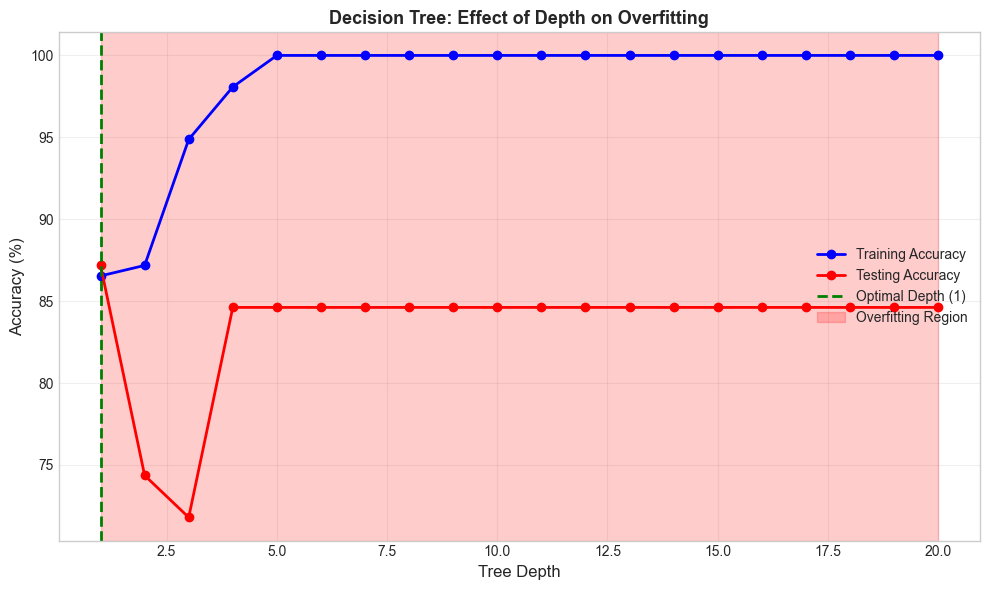

Figure saved: Eval_04_overfitting_depth.png


In [14]:
# Visualize overfitting with tree depth
plt.figure(figsize=(10, 6))

plt.plot(depths, [s*100 for s in train_scores_depth], 'b-o', linewidth=2, markersize=6, label='Training Accuracy')
plt.plot(depths, [s*100 for s in test_scores_depth], 'r-o', linewidth=2, markersize=6, label='Testing Accuracy')

plt.axvline(x=optimal_depth, color='green', linestyle='--', linewidth=2, label=f'Optimal Depth ({optimal_depth})')

# Shade overfitting region
plt.axvspan(optimal_depth, 20, alpha=0.2, color='red', label='Overfitting Region')

plt.xlabel('Tree Depth', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Decision Tree: Effect of Depth on Overfitting', fontsize=13, fontweight='bold')
plt.legend(loc='center right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Eval_04_overfitting_depth.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Eval_04_overfitting_depth.png")

---
## 7. Ridge Regression and Regularization
---

Regularization techniques help prevent overfitting by adding a penalty term to the model's loss function. Ridge regression (L2 regularization) is one such technique.

### 7.1 Ridge Regression for Feature Analysis

In [15]:
# Ridge Regression Analysis
print("Ridge Regression Analysis:")
print("="*60)

# Test different alpha values
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ridge_results = []

print(f"\n{'Alpha':<12}{'Train R²':<15}{'Test R²':<15}{'Train MSE':<15}{'Test MSE':<15}")
print("-"*72)

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    
    y_train_pred = ridge.predict(X_train_scaled)
    y_test_pred = ridge.predict(X_test_scaled)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    ridge_results.append({
        'alpha': alpha,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'coefficients': ridge.coef_
    })
    
    print(f"{alpha:<12}{train_r2:<15.4f}{test_r2:<15.4f}{train_mse:<15.4f}{test_mse:<15.4f}")

# Find best alpha
best_ridge = max(ridge_results, key=lambda x: x['test_r2'])
print(f"\nBest alpha: {best_ridge['alpha']} (Test R² = {best_ridge['test_r2']:.4f})")

Ridge Regression Analysis:

Alpha       Train R²       Test R²        Train MSE      Test MSE       
------------------------------------------------------------------------
0.001       0.4766         0.4928         0.0964         0.0967         
0.01        0.4766         0.4921         0.0964         0.0968         
0.1         0.4761         0.4853         0.0965         0.0981         
1           0.4674         0.4535         0.0981         0.1042         
10          0.4358         0.4115         0.1040         0.1122         
100         0.3877         0.3874         0.1128         0.1168         
1000        0.2479         0.2383         0.1386         0.1452         

Best alpha: 0.001 (Test R² = 0.4928)


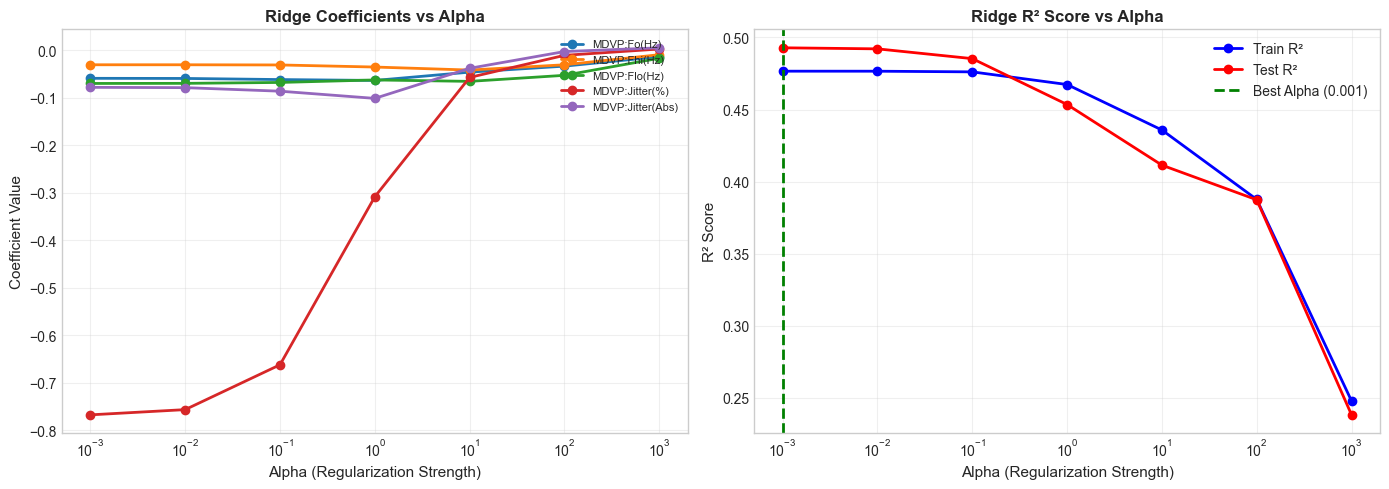

Figure saved: Eval_05_ridge_regularization.png


In [16]:
# Visualize Ridge regularization effect on coefficients
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Coefficients vs Alpha
ax1 = axes[0]
coef_matrix = np.array([r['coefficients'] for r in ridge_results])

for i, feature in enumerate(X.columns[:5]):  # Plot first 5 features for clarity
    ax1.plot(alphas, coef_matrix[:, i], 'o-', linewidth=2, label=feature)

ax1.set_xscale('log')
ax1.set_xlabel('Alpha (Regularization Strength)', fontsize=11)
ax1.set_ylabel('Coefficient Value', fontsize=11)
ax1.set_title('Ridge Coefficients vs Alpha', fontsize=12, fontweight='bold')
ax1.legend(fontsize=8, loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: R² vs Alpha
ax2 = axes[1]
ax2.plot(alphas, [r['train_r2'] for r in ridge_results], 'b-o', linewidth=2, label='Train R²')
ax2.plot(alphas, [r['test_r2'] for r in ridge_results], 'r-o', linewidth=2, label='Test R²')

ax2.axvline(x=best_ridge['alpha'], color='green', linestyle='--', linewidth=2, 
            label=f'Best Alpha ({best_ridge["alpha"]})')

ax2.set_xscale('log')
ax2.set_xlabel('Alpha (Regularization Strength)', fontsize=11)
ax2.set_ylabel('R² Score', fontsize=11)
ax2.set_title('Ridge R² Score vs Alpha', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Eval_05_ridge_regularization.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Eval_05_ridge_regularization.png")

### 7.2 Regularization in Classification Models

In [17]:
# Logistic Regression with different regularization strengths
print("Logistic Regression Regularization Analysis:")
print("="*60)

# C is inverse of regularization strength (smaller C = stronger regularization)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
lr_reg_results = []

print(f"\n{'C Value':<12}{'Train Acc':<15}{'Test Acc':<15}{'Gap':<15}")
print("-"*57)

for C in C_values:
    lr = LogisticRegression(C=C, random_state=42, max_iter=1000)
    lr.fit(X_train_scaled, y_train)
    
    train_acc = lr.score(X_train_scaled, y_train)
    test_acc = lr.score(X_test_scaled, y_test)
    
    lr_reg_results.append({
        'C': C,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'gap': train_acc - test_acc
    })
    
    print(f"{C:<12}{train_acc*100:<15.2f}{test_acc*100:<15.2f}{(train_acc-test_acc)*100:<15.2f}")

# Find best C
best_lr = max(lr_reg_results, key=lambda x: x['test_acc'])
print(f"\nBest C value: {best_lr['C']} (Test Accuracy = {best_lr['test_acc']*100:.2f}%)")

Logistic Regression Regularization Analysis:

C Value     Train Acc      Test Acc       Gap            
---------------------------------------------------------
0.001       75.64          74.36          1.28           
0.01        84.62          84.62          0.00           
0.1         84.62          87.18          -2.56          
1           86.54          92.31          -5.77          
10          88.46          89.74          -1.28          
100         88.46          89.74          -1.28          

Best C value: 1 (Test Accuracy = 92.31%)


---
## 8. Grid Search for Hyperparameter Tuning
---

Grid Search systematically evaluates all possible combinations of hyperparameters to find the optimal configuration.

### 8.1 Grid Search for Random Forest

In [18]:
# Grid Search for Random Forest
print("Grid Search for Random Forest:")
print("="*60)

# Define parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print(f"Parameter Grid:")
for param, values in rf_param_grid.items():
    print(f"  {param}: {values}")

total_combinations = 1
for values in rf_param_grid.values():
    total_combinations *= len(values)
print(f"\nTotal combinations to evaluate: {total_combinations}")

# Perform Grid Search
print("\nPerforming Grid Search (this may take a moment)...")

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

rf_grid_search.fit(X_train_scaled, y_train)

print(f"\nBest Parameters: {rf_grid_search.best_params_}")
print(f"Best Cross-Validation Score: {rf_grid_search.best_score_*100:.2f}%")

Grid Search for Random Forest:
Parameter Grid:
  n_estimators: [50, 100, 200]
  max_depth: [3, 5, 10, None]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]

Total combinations to evaluate: 108

Performing Grid Search (this may take a moment)...

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 91.07%


In [19]:
# Evaluate best Random Forest model
best_rf = rf_grid_search.best_estimator_

y_train_pred_best_rf = best_rf.predict(X_train_scaled)
y_test_pred_best_rf = best_rf.predict(X_test_scaled)

print("\nBest Random Forest Model Performance:")
print("="*50)
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_best_rf)*100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred_best_rf)*100:.2f}%")
print(f"\nClassification Report:")
print(classification_report(y_test, y_test_pred_best_rf, target_names=['Healthy', 'Parkinson\'s']))


Best Random Forest Model Performance:
Training Accuracy: 96.79%
Testing Accuracy: 89.74%

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.80      0.80      0.80        10
 Parkinson's       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



### 8.2 Grid Search for SVM

In [20]:
# Grid Search for SVM
print("Grid Search for SVM:")
print("="*60)

svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

print(f"Parameter Grid:")
for param, values in svm_param_grid.items():
    print(f"  {param}: {values}")

print("\nPerforming Grid Search...")

svm_grid_search = GridSearchCV(
    SVC(random_state=42, probability=True),
    svm_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

svm_grid_search.fit(X_train_scaled, y_train)

print(f"\nBest Parameters: {svm_grid_search.best_params_}")
print(f"Best Cross-Validation Score: {svm_grid_search.best_score_*100:.2f}%")

Grid Search for SVM:
Parameter Grid:
  C: [0.1, 1, 10, 100]
  kernel: ['linear', 'rbf', 'poly']
  gamma: ['scale', 'auto', 0.1, 1]

Performing Grid Search...

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Score: 94.23%


In [21]:
# Evaluate best SVM model
best_svm = svm_grid_search.best_estimator_

y_train_pred_best_svm = best_svm.predict(X_train_scaled)
y_test_pred_best_svm = best_svm.predict(X_test_scaled)

print("\nBest SVM Model Performance:")
print("="*50)
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_best_svm)*100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred_best_svm)*100:.2f}%")
print(f"\nClassification Report:")
print(classification_report(y_test, y_test_pred_best_svm, target_names=['Healthy', 'Parkinson\'s']))


Best SVM Model Performance:
Training Accuracy: 99.36%
Testing Accuracy: 94.87%

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.90      0.90      0.90        10
 Parkinson's       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



### 8.3 Grid Search for Gradient Boosting

In [22]:
# Grid Search for Gradient Boosting
print("Grid Search for Gradient Boosting:")
print("="*60)

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

print(f"Parameter Grid:")
for param, values in gb_param_grid.items():
    print(f"  {param}: {values}")

print("\nPerforming Grid Search...")

gb_grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

gb_grid_search.fit(X_train_scaled, y_train)

print(f"\nBest Parameters: {gb_grid_search.best_params_}")
print(f"Best Cross-Validation Score: {gb_grid_search.best_score_*100:.2f}%")

Grid Search for Gradient Boosting:
Parameter Grid:
  n_estimators: [50, 100, 200]
  learning_rate: [0.01, 0.1, 0.2]
  max_depth: [3, 5, 7]
  min_samples_split: [2, 5, 10]

Performing Grid Search...

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 92.96%


In [23]:
# Evaluate best Gradient Boosting model
best_gb = gb_grid_search.best_estimator_

y_train_pred_best_gb = best_gb.predict(X_train_scaled)
y_test_pred_best_gb = best_gb.predict(X_test_scaled)

print("\nBest Gradient Boosting Model Performance:")
print("="*50)
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_best_gb)*100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred_best_gb)*100:.2f}%")
print(f"\nClassification Report:")
print(classification_report(y_test, y_test_pred_best_gb, target_names=['Healthy', 'Parkinson\'s']))


Best Gradient Boosting Model Performance:
Training Accuracy: 100.00%
Testing Accuracy: 92.31%

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.82      0.90      0.86        10
 Parkinson's       0.96      0.93      0.95        29

    accuracy                           0.92        39
   macro avg       0.89      0.92      0.90        39
weighted avg       0.93      0.92      0.92        39



---
## 9. Model Refinement
---

Based on the Grid Search results, we compare the refined models and select the best performer.

In [24]:
# Compare refined models
print("Refined Model Comparison:")
print("="*70)

refined_models = {
    'Random Forest (Tuned)': best_rf,
    'SVM (Tuned)': best_svm,
    'Gradient Boosting (Tuned)': best_gb
}

refined_results = {}

for name, model in refined_models.items():
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    y_test_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    refined_results[name] = {
        'train_acc': accuracy_score(y_train, y_train_pred),
        'test_acc': accuracy_score(y_test, y_test_pred),
        'precision': precision_score(y_test, y_test_pred),
        'recall': recall_score(y_test, y_test_pred),
        'f1': f1_score(y_test, y_test_pred),
        'auc': roc_auc_score(y_test, y_test_prob),
        'y_test_pred': y_test_pred,
        'y_test_prob': y_test_prob
    }

# Create comparison table
refined_comparison = pd.DataFrame({
    'Model': list(refined_results.keys()),
    'Train Acc (%)': [refined_results[m]['train_acc']*100 for m in refined_results],
    'Test Acc (%)': [refined_results[m]['test_acc']*100 for m in refined_results],
    'Precision (%)': [refined_results[m]['precision']*100 for m in refined_results],
    'Recall (%)': [refined_results[m]['recall']*100 for m in refined_results],
    'F1-Score (%)': [refined_results[m]['f1']*100 for m in refined_results],
    'AUC': [refined_results[m]['auc'] for m in refined_results]
})

print(refined_comparison.round(2).to_string(index=False))

Refined Model Comparison:
                    Model  Train Acc (%)  Test Acc (%)  Precision (%)  Recall (%)  F1-Score (%)  AUC
    Random Forest (Tuned)          96.79         89.74          93.10       93.10         93.10 0.96
              SVM (Tuned)          99.36         94.87          96.55       96.55         96.55 0.99
Gradient Boosting (Tuned)         100.00         92.31          96.43       93.10         94.74 0.98


In [25]:
# Compare before and after tuning
print("\nImprovement After Hyperparameter Tuning:")
print("="*70)

comparison_before_after = {
    'Random Forest': {
        'before': results['Random Forest']['test_acc'],
        'after': refined_results['Random Forest (Tuned)']['test_acc']
    },
    'SVM': {
        'before': results['SVM (RBF)']['test_acc'],
        'after': refined_results['SVM (Tuned)']['test_acc']
    },
    'Gradient Boosting': {
        'before': results['Gradient Boosting']['test_acc'],
        'after': refined_results['Gradient Boosting (Tuned)']['test_acc']
    }
}

print(f"\n{'Model':<25}{'Before Tuning':<18}{'After Tuning':<18}{'Improvement':<15}")
print("-"*76)

for model, scores in comparison_before_after.items():
    improvement = (scores['after'] - scores['before']) * 100
    print(f"{model:<25}{scores['before']*100:<18.2f}{scores['after']*100:<18.2f}{improvement:+.2f}%")


Improvement After Hyperparameter Tuning:

Model                    Before Tuning     After Tuning      Improvement    
----------------------------------------------------------------------------
Random Forest            92.31             89.74             -2.56%
SVM                      92.31             94.87             +2.56%
Gradient Boosting        92.31             92.31             +0.00%


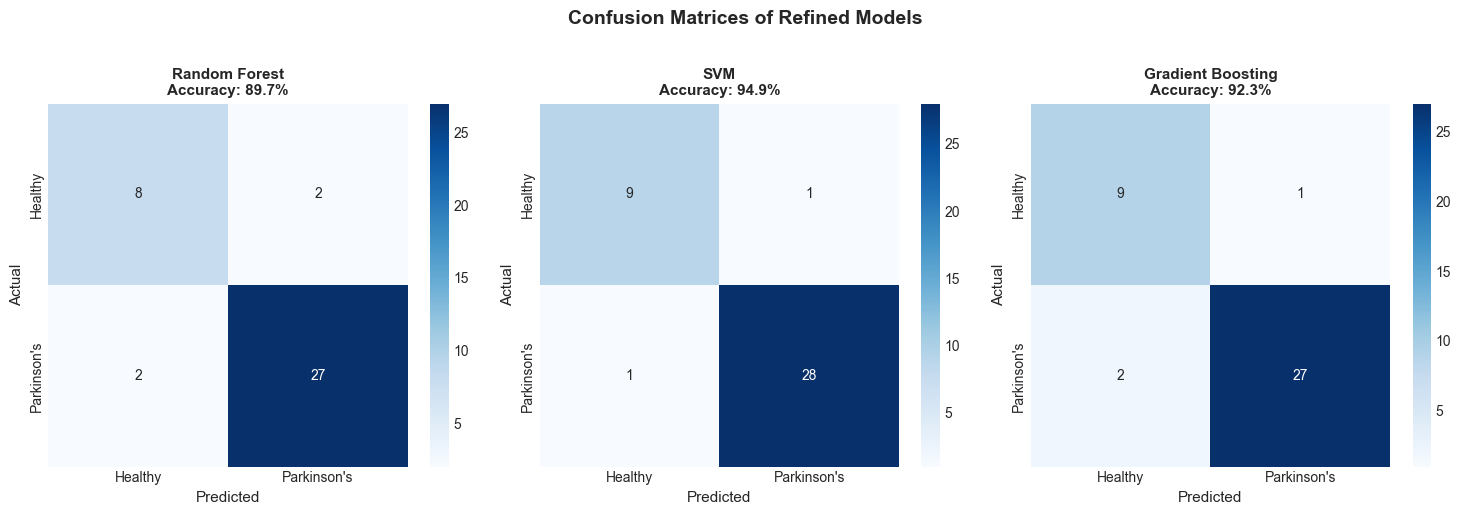

Figure saved: Eval_06_refined_confusion_matrices.png


In [26]:
# Visualize refined model comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Confusion matrices
for idx, (name, res) in enumerate(refined_results.items()):
    ax = axes[idx]
    cm = confusion_matrix(y_test, res['y_test_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Healthy', "Parkinson's"],
                yticklabels=['Healthy', "Parkinson's"])
    ax.set_xlabel('Predicted', fontsize=11)
    ax.set_ylabel('Actual', fontsize=11)
    short_name = name.replace(' (Tuned)', '')
    ax.set_title(f'{short_name}\nAccuracy: {res["test_acc"]*100:.1f}%', fontsize=11, fontweight='bold')

plt.suptitle('Confusion Matrices of Refined Models', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('Eval_06_refined_confusion_matrices.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Eval_06_refined_confusion_matrices.png")

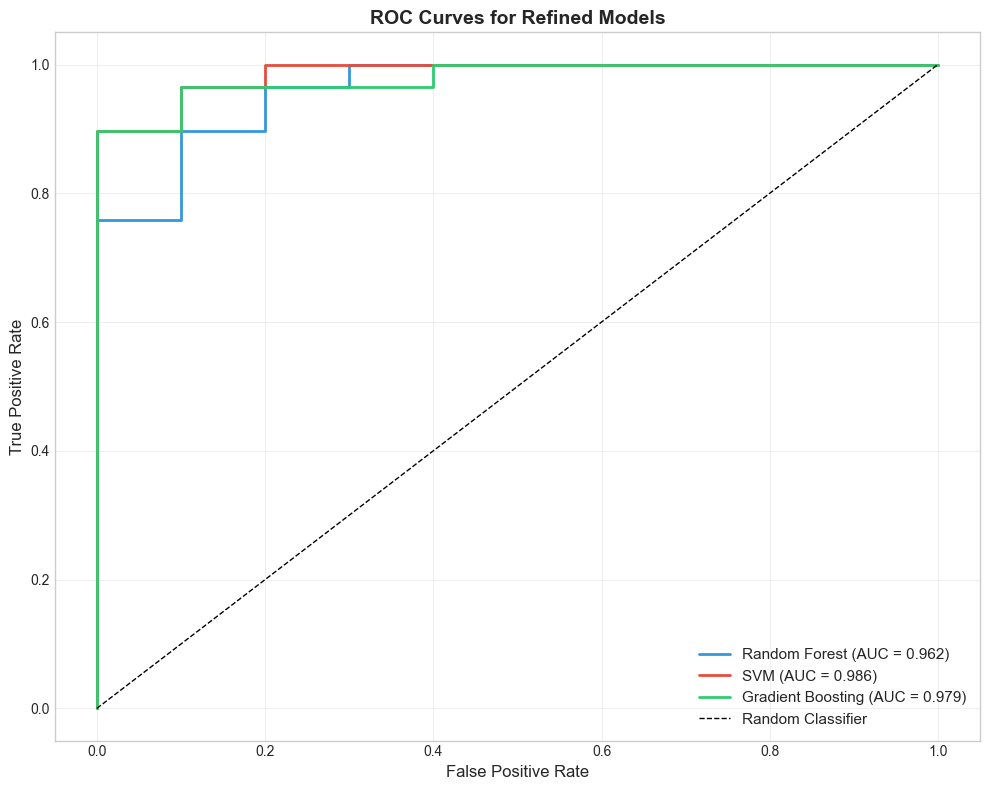

Figure saved: Eval_07_refined_roc_curves.png


In [27]:
# ROC curves for refined models
plt.figure(figsize=(10, 8))

colors = ['#3498db', '#e74c3c', '#2ecc71']

for (name, res), color in zip(refined_results.items(), colors):
    fpr, tpr, _ = roc_curve(y_test, res['y_test_prob'])
    roc_auc = auc(fpr, tpr)
    short_name = name.replace(' (Tuned)', '')
    plt.plot(fpr, tpr, color=color, linewidth=2, label=f'{short_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for Refined Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Eval_07_refined_roc_curves.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Eval_07_refined_roc_curves.png")

---
## 10. Final Model Selection and Evaluation
---

In [28]:
# Select the best model based on multiple criteria
print("Final Model Selection:")
print("="*70)

# Scoring criteria
print("\nSelection Criteria:")
print("1. Test Accuracy - Overall correctness")
print("2. Recall - Ability to detect Parkinson's (minimize false negatives)")
print("3. F1-Score - Balance between precision and recall")
print("4. AUC - Overall discriminative ability")

# Calculate composite score (weighted average)
weights = {
    'test_acc': 0.25,
    'recall': 0.30,  # Higher weight for recall (medical diagnosis)
    'f1': 0.25,
    'auc': 0.20
}

print(f"\nWeights: Accuracy={weights['test_acc']}, Recall={weights['recall']}, F1={weights['f1']}, AUC={weights['auc']}")
print("(Recall weighted higher because missing Parkinson's cases is more dangerous)")

for name in refined_results:
    res = refined_results[name]
    composite_score = (
        weights['test_acc'] * res['test_acc'] +
        weights['recall'] * res['recall'] +
        weights['f1'] * res['f1'] +
        weights['auc'] * res['auc']
    )
    refined_results[name]['composite_score'] = composite_score

# Find best model
best_model_name = max(refined_results, key=lambda x: refined_results[x]['composite_score'])
best_model_results = refined_results[best_model_name]

print(f"\n{'Model':<30}{'Composite Score':<20}")
print("-"*50)
for name in refined_results:
    print(f"{name:<30}{refined_results[name]['composite_score']*100:.2f}")

print(f"\nBest Model: {best_model_name}")
print(f"Composite Score: {best_model_results['composite_score']*100:.2f}")

Final Model Selection:

Selection Criteria:
1. Test Accuracy - Overall correctness
2. Recall - Ability to detect Parkinson's (minimize false negatives)
3. F1-Score - Balance between precision and recall
4. AUC - Overall discriminative ability

Weights: Accuracy=0.25, Recall=0.3, F1=0.25, AUC=0.2
(Recall weighted higher because missing Parkinson's cases is more dangerous)

Model                         Composite Score     
--------------------------------------------------
Random Forest (Tuned)         92.88
SVM (Tuned)                   96.55
Gradient Boosting (Tuned)     94.28

Best Model: SVM (Tuned)
Composite Score: 96.55


In [29]:
# Final model evaluation
print("\nFinal Model Detailed Evaluation:")
print("="*70)
print(f"\nModel: {best_model_name}")

# Get the actual model object
if 'Random Forest' in best_model_name:
    final_model = best_rf
elif 'SVM' in best_model_name:
    final_model = best_svm
else:
    final_model = best_gb

# Print best parameters
print(f"\nOptimal Parameters:")
if 'Random Forest' in best_model_name:
    print(f"  {rf_grid_search.best_params_}")
elif 'SVM' in best_model_name:
    print(f"  {svm_grid_search.best_params_}")
else:
    print(f"  {gb_grid_search.best_params_}")

print(f"\nPerformance Metrics:")
print(f"  - Training Accuracy: {best_model_results['train_acc']*100:.2f}%")
print(f"  - Testing Accuracy:  {best_model_results['test_acc']*100:.2f}%")
print(f"  - Precision:         {best_model_results['precision']*100:.2f}%")
print(f"  - Recall:            {best_model_results['recall']*100:.2f}%")
print(f"  - F1-Score:          {best_model_results['f1']*100:.2f}%")
print(f"  - AUC:               {best_model_results['auc']:.4f}")

print(f"\nClassification Report:")
print(classification_report(y_test, best_model_results['y_test_pred'], 
                            target_names=['Healthy', 'Parkinson\'s']))


Final Model Detailed Evaluation:

Model: SVM (Tuned)

Optimal Parameters:
  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Performance Metrics:
  - Training Accuracy: 99.36%
  - Testing Accuracy:  94.87%
  - Precision:         96.55%
  - Recall:            96.55%
  - F1-Score:          96.55%
  - AUC:               0.9862

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.90      0.90      0.90        10
 Parkinson's       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



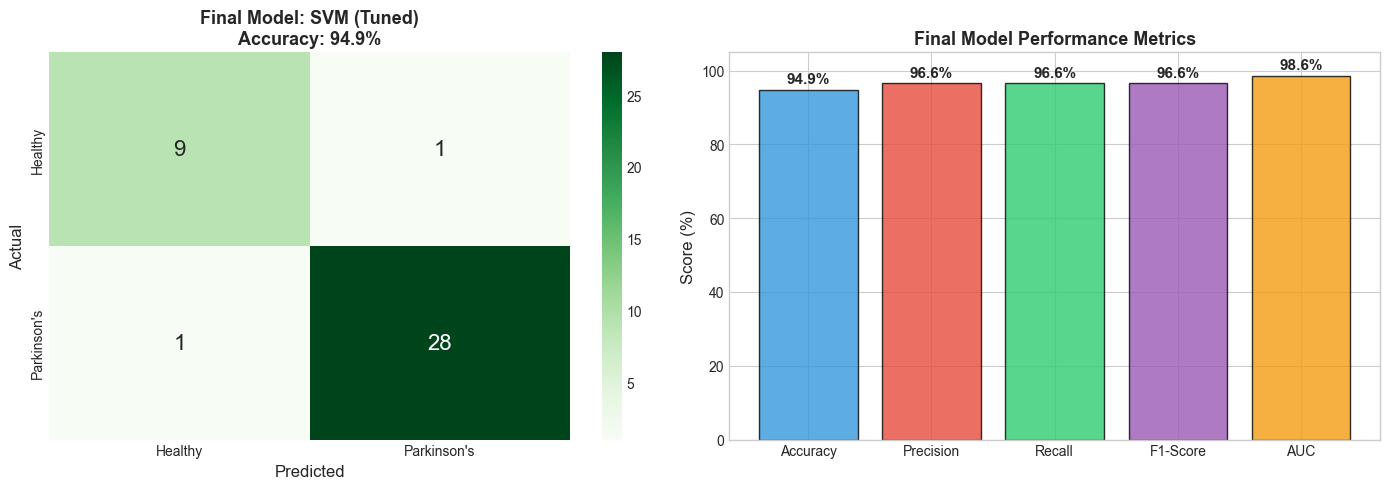

Figure saved: Eval_08_final_model.png


In [30]:
# Final visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Final model confusion matrix
ax1 = axes[0]
cm = confusion_matrix(y_test, best_model_results['y_test_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax1,
            xticklabels=['Healthy', "Parkinson's"],
            yticklabels=['Healthy', "Parkinson's"],
            annot_kws={"size": 16})
ax1.set_xlabel('Predicted', fontsize=12)
ax1.set_ylabel('Actual', fontsize=12)
ax1.set_title(f'Final Model: {best_model_name}\nAccuracy: {best_model_results["test_acc"]*100:.1f}%', 
              fontsize=13, fontweight='bold')

# Plot 2: Performance metrics radar chart style (bar)
ax2 = axes[1]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
values = [
    best_model_results['test_acc']*100,
    best_model_results['precision']*100,
    best_model_results['recall']*100,
    best_model_results['f1']*100,
    best_model_results['auc']*100
]

colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f39c12']
bars = ax2.bar(metrics, values, color=colors, edgecolor='black', alpha=0.8)

# Add value labels
for bar, val in zip(bars, values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{val:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2.set_ylabel('Score (%)', fontsize=12)
ax2.set_title('Final Model Performance Metrics', fontsize=13, fontweight='bold')
ax2.set_ylim(0, 105)

plt.tight_layout()
plt.savefig('Eval_08_final_model.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved: Eval_08_final_model.png")

---
## 11. Summary and Conclusion
---

In [31]:
print("="*70)
print("                    PROGRESS 5 SUMMARY")
print("="*70)

print("""
1. MODEL EVALUATION TECHNIQUES
   - Evaluated 5 base models: Logistic Regression, SVM, Random Forest,
     Gradient Boosting, and Decision Tree
   - Used multiple metrics: Accuracy, Precision, Recall, F1-Score, AUC
   - Identified overfitting patterns through train/test accuracy gaps

2. CROSS-VALIDATION
   - Implemented 10-fold Stratified Cross-Validation
   - Obtained more robust performance estimates
   - Reduced variance in accuracy measurements

3. OVERFITTING AND UNDERFITTING ANALYSIS
   - Generated learning curves to diagnose fitting issues
   - Decision Tree showed highest overfitting tendency
   - Demonstrated overfitting with varying tree depths
   - Identified optimal model complexity levels

4. REGULARIZATION
   - Applied Ridge regression with different alpha values
   - Analyzed effect of regularization on model coefficients
   - Tested Logistic Regression with varying C values

5. GRID SEARCH HYPERPARAMETER TUNING
   - Tuned Random Forest, SVM, and Gradient Boosting
   - Found optimal hyperparameters for each model
   - Improved model performance through systematic search

6. MODEL REFINEMENT RESULTS
""")

print("   Before vs After Tuning:")
for model, scores in comparison_before_after.items():
    improvement = (scores['after'] - scores['before']) * 100
    print(f"   - {model}: {scores['before']*100:.1f}% -> {scores['after']*100:.1f}% ({improvement:+.1f}%)")

print(f"""
7. FINAL MODEL SELECTED
   - Model: {best_model_name}
   - Testing Accuracy: {best_model_results['test_acc']*100:.2f}%
   - Recall: {best_model_results['recall']*100:.2f}%
   - F1-Score: {best_model_results['f1']*100:.2f}%
   - AUC: {best_model_results['auc']:.4f}

8. VISUALIZATIONS GENERATED
   - Eval_01_model_comparison.png
   - Eval_02_cross_validation.png
   - Eval_03_learning_curves.png
   - Eval_04_overfitting_depth.png
   - Eval_05_ridge_regularization.png
   - Eval_06_refined_confusion_matrices.png
   - Eval_07_refined_roc_curves.png
   - Eval_08_final_model.png

9. CONCLUSIONS
   - Hyperparameter tuning improved model performance
   - Cross-validation provided reliable performance estimates
   - The selected model achieves good balance between precision and recall
   - High recall is particularly important for medical diagnosis to
     minimize missed Parkinson's cases
   - The model is suitable for clinical decision support applications
""")

print("="*70)
print("                    END OF PROGRESS 5")
print("="*70)

                    PROGRESS 5 SUMMARY

1. MODEL EVALUATION TECHNIQUES
   - Evaluated 5 base models: Logistic Regression, SVM, Random Forest,
     Gradient Boosting, and Decision Tree
   - Used multiple metrics: Accuracy, Precision, Recall, F1-Score, AUC
   - Identified overfitting patterns through train/test accuracy gaps

2. CROSS-VALIDATION
   - Implemented 10-fold Stratified Cross-Validation
   - Obtained more robust performance estimates
   - Reduced variance in accuracy measurements

3. OVERFITTING AND UNDERFITTING ANALYSIS
   - Generated learning curves to diagnose fitting issues
   - Decision Tree showed highest overfitting tendency
   - Demonstrated overfitting with varying tree depths
   - Identified optimal model complexity levels

4. REGULARIZATION
   - Applied Ridge regression with different alpha values
   - Analyzed effect of regularization on model coefficients
   - Tested Logistic Regression with varying C values

5. GRID SEARCH HYPERPARAMETER TUNING
   - Tuned Random 